In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
ruta='C:/Users/Emilio/Desktop/Ingenieria de las Caracteristicas/Clases/Archivos/'

* Leer la base de datos `edades.csv`

In [3]:
df=pd.read_csv(ruta+'edades.csv')
df

,edades
0,0
1,0
2,1
3,1
4,1
...,...
231,62
232,63
233,84
234,101


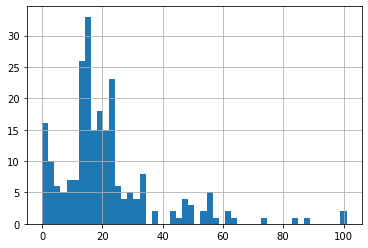

In [4]:
H=df['edades'].hist(bins=50)

* Discretizar los datos en 10 intervalos iguales. ¿Cuántas personas forman parte de cada intervalo? ¿Cuál es este intervalo?

In [41]:
df['disc_edades']=pd.qcut(df['edades'],10)
df.groupby('disc_edades')['edades'].count()


disc_edades
(-0.001, 4.0]    26
(4.0, 12.0]      25
(12.0, 14.0]     26
(14.0, 15.0]     18
(15.0, 18.0]     30
(18.0, 20.0]     18
(20.0, 23.5]     22
(23.5, 27.0]     25
(27.0, 44.0]     22
(44.0, 101.0]    24
Name: edades, dtype: int64

* Discretizar los datos en edades de 10 en 10. ¿Cuántas personas forman parte de cada intervalo?

In [25]:
m= min(df['edades'])
M= df['edades'].max()
binas= 10
ancho=(M-m)/binas
ancho= 10

In [31]:
intervalos= np.arange(m,M+ancho,ancho)
intervalos

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110])

In [32]:
df['disc_edades']=pd.cut(df['edades'],intervalos,include_lowest=False)
df.groupby('disc_edades')['edades'].count()

disc_edades
(0, 10]       39
(10, 20]      99
(20, 30]      53
(30, 40]      14
(40, 50]      10
(50, 60]       8
(60, 70]       3
(70, 80]       1
(80, 90]       2
(90, 100]      1
(100, 110]     1
Name: edades, dtype: int64

* Discretizar los datos y nombrar los intervalos de acuerdo a la siguiente tabla:

Nombre del rango|Rango
------------------|:--------:
bebé|0-2
niño|3-11
adolecente|12-17
joven|18-25
adulto joven|26-39
adulto maduro|40-59
adulto mayor |60 en adelante

Para nombrar los intervalos use el argumento `labels` de la función `cut`

In [52]:
nombres= ['bebe','niño','adolescente','joven','adulto joven','adulto maduro','adulto mayor']
intervalosb= np.array([0,2,11,17,25,39,69,df['edades'].max()])
df['disc_edades']=pd.cut(df['edades'],intervalosb,labels= nombres)
xf=df.groupby('disc_edades')['edades'].count()
xf

disc_edades
bebe             11
niño             28
adolescente      66
joven            71
adulto joven     29
adulto maduro    21
adulto mayor      5
Name: edades, dtype: int64

* Mostrar un histograma de esta última discretización (¿Cuántas personas forman parte de cada grupo?).

<AxesSubplot:>

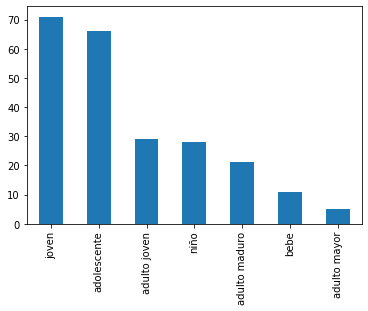

In [83]:
fig, ax = plt.subplots()
df['disc_edades'].value_counts().plot(ax=ax,kind='bar')

* Leer el archivo llamado `Vol-Pot.csv`

In [72]:
dt=pd.read_csv(ruta+'vol-pot.csv')
dt

,Volumen,Potencia
0,0.000000,0.000000
1,0.010001,0.000500
2,0.020002,0.001001
3,0.030003,0.001501
4,0.040004,0.002002
...,...,...
9995,99.959996,147.116600
9996,99.969997,147.190684
9997,99.979998,147.264805
9998,99.989999,147.338964


* Discretizar la columna de `Potencia` en 10 binas de forma que el intervalo crezca de forma exponencial:
```python
bins=10
intervalo=[np.exp(A*i)-B for i in range(bins+1)]
```
(Encontrar `A` y `B` de forma que abarque el rango de la columna `Potencia`).

In [73]:
A=0.5
B=1
bins=10
intervalo=[np.exp(A*i)-B for i in range(bins+1)]
intervalo

[0.0,
 0.6487212707001282,
 1.718281828459045,
 3.4816890703380645,
 6.38905609893065,
 11.182493960703473,
 19.085536923187668,
 32.11545195869231,
 53.598150033144236,
 89.01713130052181,
 147.4131591025766]

* ¿Cuántos datos se agrupan en cada intervalo para la columna de `Potencia` y cuántos para la columna de `Volumen`?

In [75]:
dt['disc_potencia']=pd.cut(dt['Potencia'],intervalo)
dt.groupby('disc_potencia')['Potencia'].count()

disc_potencia
(0.0, 0.649]          999
(0.649, 1.718]       1000
(1.718, 3.482]       1000
(3.482, 6.389]       1000
(6.389, 11.182]      1000
(11.182, 19.086]     1000
(19.086, 32.115]     1000
(32.115, 53.598]     1000
(53.598, 89.017]     1000
(89.017, 147.413]    1000
Name: Potencia, dtype: int64

In [77]:
dt['disc_volumen']=pd.cut(dt['Volumen'],intervalo)
dt.groupby('disc_volumen')['Volumen'].count()

disc_volumen
(0.0, 0.649]           64
(0.649, 1.718]        107
(1.718, 3.482]        177
(3.482, 6.389]        290
(6.389, 11.182]       480
(11.182, 19.086]      790
(19.086, 32.115]     1303
(32.115, 53.598]     2148
(53.598, 89.017]     3541
(89.017, 147.413]    1099
Name: Volumen, dtype: int64